In [1]:
import pathlib
import PIL.Image

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [3]:
l="C:\\Users\\aryan\\Downloads\\MED SEG\\gaussian_filtered_images\\gaussian_filtered_images"

In [4]:
loc=pathlib.Path(l)
loc

WindowsPath('C:/Users/aryan/Downloads/MED SEG/gaussian_filtered_images/gaussian_filtered_images')

In [5]:
mild=list(loc.glob('Mild/*'))
moderate=list(loc.glob('Moderate/*'))
severe=list(loc.glob('Severe/*'))
none=list(loc.glob('No_DR/*'))
proliferate=list(loc.glob('Proliferate/*'))

In [6]:
location={
    'mild':list(loc.glob('Mild/*')),
    'moderate':list(loc.glob('Moderate/*')),
    'severe':list(loc.glob('Severe/*')),
    'none':list(loc.glob('No_DR/*'))
}

In [7]:
label={
    'mild':1,
    'moderate':2,
    'severe':3,
    'none':0
}

In [8]:
x=cv2.imread(str(location['severe'][2]))
x
x.shape

(224, 224, 3)

In [9]:
for x,y in location.items():
    print(x)
    print(len(y))

mild
370
moderate
999
severe
193
none
1805


In [10]:
x,y=[],[]
for res,pic in location.items():
    for image in pic:
        img=cv2.imread(str(image))
        x.append(cv2.resize(img,(32,32)))
        y.append(label[res])

In [11]:
len(x)

3367

In [12]:
len(y)

3367

In [13]:
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(3367, 32, 32, 3)
(3367,)


In [14]:
x=x/255

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=5,test_size=0.1)

In [16]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3030, 32, 32, 3)
(337, 32, 32, 3)
(3030,)
(337,)


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

                                                        ANN

In [18]:
ann2=keras.Sequential([keras.layers.Dense(100,activation='relu'),
                      keras.layers.Flatten(),
                      keras.layers.Dropout(0.2),
                      keras.layers.BatchNormalization(),
                      keras.layers.Dense(50,activation='sigmoid'),
                      keras.layers.Dense(4,activation='softmax')])
ann2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
ann2.fit(xtrain,ytrain,epochs=5,batch_size=100)

Epoch 1/5
31/31 [==============================] - 12s 353ms/step - loss: 0.7145 - accuracy: 0.7267
Epoch 2/5
31/31 [==============================] - 11s 340ms/step - loss: 0.5063 - accuracy: 0.8102
Epoch 3/5
31/31 [==============================] - 12s 379ms/step - loss: 0.4203 - accuracy: 0.8439
Epoch 4/5
31/31 [==============================] - 12s 395ms/step - loss: 0.3242 - accuracy: 0.8802
Epoch 5/5
31/31 [==============================] - 12s 391ms/step - loss: 0.2438 - accuracy: 0.9221


In [20]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32,input_shape=(32,32,3), kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(8, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
cnn.fit(xtrain,ytrain,epochs=20,batch_size=100)

Epoch 1/20
31/31 [==============================] - 2s 60ms/step - loss: 1.1864 - accuracy: 0.4977
Epoch 2/20
31/31 [==============================] - 2s 72ms/step - loss: 1.0807 - accuracy: 0.5360
Epoch 3/20
31/31 [==============================] - 2s 58ms/step - loss: 0.9739 - accuracy: 0.5785
Epoch 4/20
31/31 [==============================] - 2s 52ms/step - loss: 0.7981 - accuracy: 0.7215
Epoch 5/20
31/31 [==============================] - 2s 55ms/step - loss: 0.7414 - accuracy: 0.7287
Epoch 6/20
31/31 [==============================] - 2s 58ms/step - loss: 0.7212 - accuracy: 0.7327
Epoch 7/20
31/31 [==============================] - 2s 53ms/step - loss: 0.6925 - accuracy: 0.7399
Epoch 8/20
31/31 [==============================] - 2s 53ms/step - loss: 0.6665 - accuracy: 0.7528
Epoch 9/20
31/31 [==============================] - 2s 60ms/step - loss: 0.6590 - accuracy: 0.7449
Epoch 10/20
31/31 [==============================] - 2s 54ms/step - loss: 0.6367 - accuracy: 0.7587
Epoch 11/

In [23]:
pred=cnn.predict(xtest)

In [24]:
import seaborn as sns

In [25]:
pred.shape

(337, 4)

In [26]:
ytest.shape

(337,)

In [27]:
predict_class = np.argmax(pred, axis=1)
predict_class = predict_class.tolist()
predict_class

[1,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 3,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 3,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 3,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 3,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 2,
 0,


<AxesSubplot:>

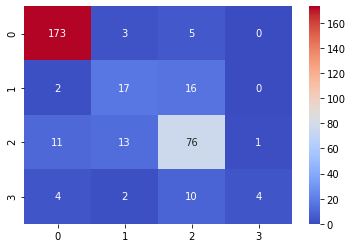

In [28]:
sns.heatmap(tf.math.confusion_matrix(ytest,predict_class),annot=True,cmap='coolwarm',fmt='d')

In [29]:
cnntest = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(32,32,3)),
    layers.experimental.preprocessing.RandomContrast(factor=0.2),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.Conv2D(filters=32,input_shape=(32,32,3), kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(64, 5, padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.05),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])
cnntest.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
cnntest.fit(xtrain,ytrain,epochs=10,batch_size=100,validation_split=0.2,shuffle=True)

Epoch 1/10
25/25 [==============================] - 3s 94ms/step - loss: 1.2350 - accuracy: 0.4418 - val_loss: 1.0887 - val_accuracy: 0.5429
Epoch 2/10
25/25 [==============================] - 2s 80ms/step - loss: 1.1401 - accuracy: 0.5206 - val_loss: 1.0660 - val_accuracy: 0.5429
Epoch 3/10
25/25 [==============================] - 2s 75ms/step - loss: 1.1277 - accuracy: 0.5264 - val_loss: 1.0526 - val_accuracy: 0.5429
Epoch 4/10
25/25 [==============================] - 2s 74ms/step - loss: 1.1096 - accuracy: 0.5223 - val_loss: 1.0219 - val_accuracy: 0.5429
Epoch 5/10
25/25 [==============================] - 2s 76ms/step - loss: 1.0577 - accuracy: 0.5297 - val_loss: 1.6132 - val_accuracy: 0.5429
Epoch 6/10
25/25 [==============================] - 2s 73ms/step - loss: 1.0138 - accuracy: 0.5479 - val_loss: 1.0591 - val_accuracy: 0.5380
Epoch 7/10
25/25 [==============================] - 2s 72ms/step - loss: 0.9681 - accuracy: 0.6167 - val_loss: 1.2117 - val_accuracy: 0.5512
Epoch 8/10
25

<AxesSubplot:>

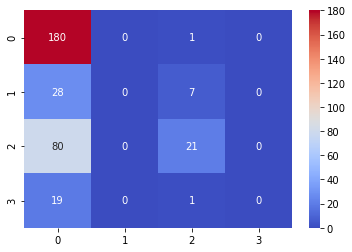

In [31]:
pred2=cnntest.predict(xtest)
pc = np.argmax(pred2, axis=1)
pc = pc.tolist()
sns.heatmap(tf.math.confusion_matrix(ytest,pc),annot=True,cmap='coolwarm',fmt='d')

In [32]:
cnntest.evaluate(xtest,ytest)

11/11 [==============================] - 0s 8ms/step - loss: 1.1875 - accuracy: 0.5964


[1.1874767541885376, 0.5964391827583313]

In [33]:
tf.math.confusion_matrix(ytest,pc)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[180,   0,   1,   0],
       [ 28,   0,   7,   0],
       [ 80,   0,  21,   0],
       [ 19,   0,   1,   0]])>

In [34]:
cnntest.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_contrast (RandomContr (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation (RandomRotat (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)         

conv pool conv pool

In [35]:
x = keras.Sequential([
    layers.Conv2D(32, input_shape=(32,32,3),kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])
x.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
x.fit(xtrain,ytrain,epochs=20,batch_size=100)

Epoch 1/20
31/31 [==============================] - 2s 58ms/step - loss: 1.0943 - accuracy: 0.5360
Epoch 2/20
31/31 [==============================] - 2s 61ms/step - loss: 0.9299 - accuracy: 0.5990
Epoch 3/20
31/31 [==============================] - 2s 64ms/step - loss: 0.7745 - accuracy: 0.7264
Epoch 4/20
31/31 [==============================] - 2s 58ms/step - loss: 0.6948 - accuracy: 0.7422
Epoch 5/20
31/31 [==============================] - 2s 57ms/step - loss: 0.6562 - accuracy: 0.7492
Epoch 6/20
31/31 [==============================] - 2s 62ms/step - loss: 0.6260 - accuracy: 0.7591
Epoch 7/20
31/31 [==============================] - 2s 60ms/step - loss: 0.6000 - accuracy: 0.7736
Epoch 8/20
31/31 [==============================] - 2s 66ms/step - loss: 0.5860 - accuracy: 0.7812
Epoch 9/20
31/31 [==============================] - 2s 60ms/step - loss: 0.6013 - accuracy: 0.7703
Epoch 10/20
31/31 [==============================] - 2s 61ms/step - loss: 0.5731 - accuracy: 0.7858
Epoch 11/

In [37]:
print(x.summary())
print(x.evaluate(xtest,ytest))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

<AxesSubplot:>

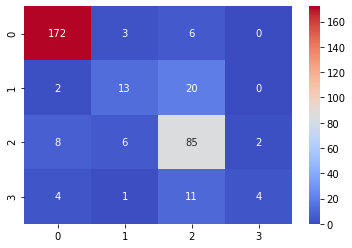

In [38]:
pred3=x.predict(xtest)
pc = np.argmax(pred3, axis=1)
pc = pc.tolist()
sns.heatmap(tf.math.confusion_matrix(ytest,pc),annot=True,cmap='coolwarm',fmt='d')

In [39]:
##

In [40]:
x2 = keras.Sequential([
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(32,32,3)),
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [41]:
x2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
x2.fit(xtrain,ytrain,epochs=20,batch_size=100)

Epoch 1/20
31/31 [==============================] - 3s 95ms/step - loss: 1.2366 - accuracy: 0.4891
Epoch 2/20
31/31 [==============================] - 3s 88ms/step - loss: 0.9153 - accuracy: 0.6277
Epoch 3/20
31/31 [==============================] - 3s 86ms/step - loss: 0.7584 - accuracy: 0.7162
Epoch 4/20
31/31 [==============================] - 3s 84ms/step - loss: 0.6773 - accuracy: 0.7403
Epoch 5/20
31/31 [==============================] - 3s 85ms/step - loss: 0.6378 - accuracy: 0.7584
Epoch 6/20
31/31 [==============================] - 3s 85ms/step - loss: 0.6420 - accuracy: 0.7521
Epoch 7/20
31/31 [==============================] - 3s 88ms/step - loss: 0.5983 - accuracy: 0.7739
Epoch 8/20
31/31 [==============================] - 3s 84ms/step - loss: 0.5906 - accuracy: 0.7785
Epoch 9/20
31/31 [==============================] - 3s 89ms/step - loss: 0.5979 - accuracy: 0.7802
Epoch 10/20
31/31 [==============================] - 3s 90ms/step - loss: 0.5603 - accuracy: 0.7898
Epoch 11/

<AxesSubplot:>

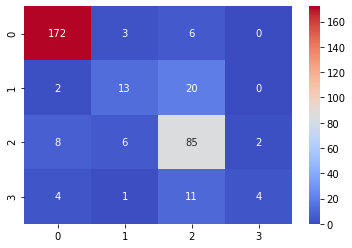

In [43]:
pred4=x.predict(xtest)
pc = np.argmax(pred4, axis=1)
pc = pc.tolist()
sns.heatmap(tf.math.confusion_matrix(ytest,pc),annot=True,cmap='coolwarm',fmt='d')

In [44]:
print(x2.summary())
print(x2.evaluate(xtest,ytest))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)             

In [45]:
from keras.utils import np_utils
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import keras_tuner as kt

<ipython-input-45-e60b6c0b890e>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch
